In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import itertools

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [135]:
ratings = pd.read_csv('data/ratings.csv')
movies = pd.read_csv('data/movies.csv')
tags = pd.read_csv('data/tags.csv')
links = pd.read_csv('data/links.csv')

In [137]:
print("Ratings Data:")
ratings.head()

Ratings Data:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [139]:
print("Movies Data:")
movies.head()

Movies Data:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [141]:
print("Tags Data:")
tags.head()

Tags Data:


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [143]:
print("Links Data:")
links.head()

Links Data:


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [145]:
print("\nRatings Dataset Info:")
ratings.info()

print("\nMovies Dataset Info:")
movies.info()


Ratings Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB

Movies Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [147]:
print("\nMissing Values in Ratings:")
print(ratings.isnull().sum())

print("\nMissing Values in Movies:")
print(movies.isnull().sum())


Missing Values in Ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing Values in Movies:
movieId    0
title      0
genres     0
dtype: int64


In [149]:
print("\nBasic Statistics of Ratings:")
print(ratings['rating'].describe())


Basic Statistics of Ratings:
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


In [151]:
num_users = ratings['userId'].nunique()
num_movies = ratings['movieId'].nunique()
print(f"\nNumber of unique users: {num_users}")
print(f"Number of unique movies: {num_movies}")


Number of unique users: 610
Number of unique movies: 9724


In [153]:
ratings_movies = pd.merge(ratings, movies, on='movieId')

most_rated = ratings_movies['title'].value_counts().head(10)
print("\nMost Rated Movies:")
print(most_rated)


Most Rated Movies:
title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64


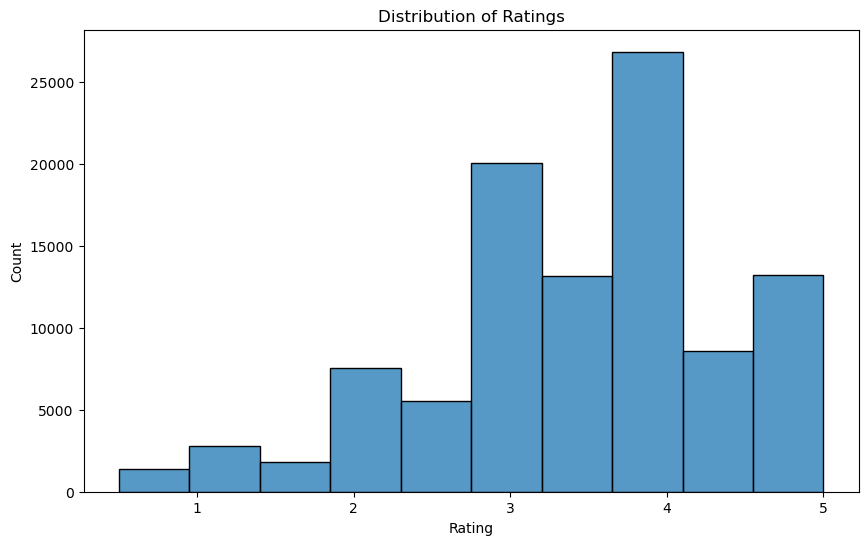

In [155]:
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

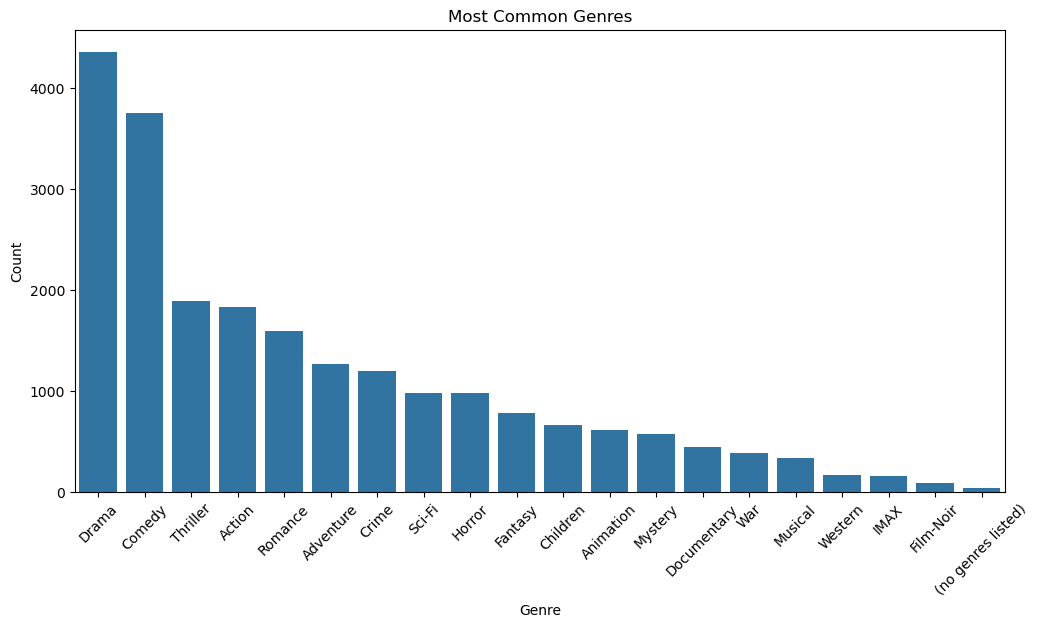

In [157]:
movies['genres'] = movies['genres'].str.split('|')  # Split genres into lists
all_genres = [genre for sublist in movies['genres'] for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Ratings Per User Statistics:
count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
dtype: float64


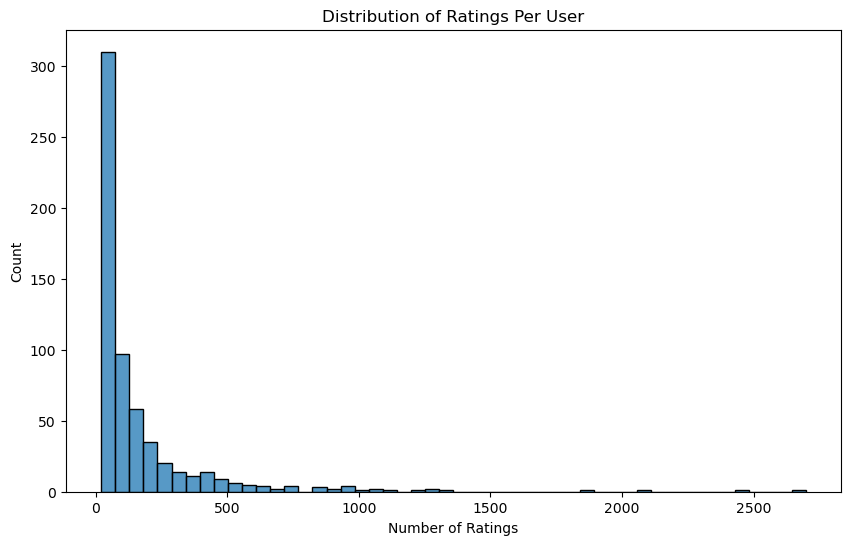

In [159]:
ratings_per_user = ratings.groupby('userId').size()
print("\nRatings Per User Statistics:")
print(ratings_per_user.describe())

plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=50, kde=False)
plt.title('Distribution of Ratings Per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()


In [161]:
ratings['user_mean'] = ratings.groupby('userId')['rating'].transform('mean')
ratings['normalized_rating'] = ratings['rating'] - ratings['user_mean']

print("Data after normalization:")
ratings.head()

Data after normalization:


,userId,movieId,rating,timestamp,user_mean,normalized_rating
0,1,1,4.0,964982703,4.366379,-0.366379
1,1,3,4.0,964981247,4.366379,-0.366379
2,1,6,4.0,964982224,4.366379,-0.366379
3,1,47,5.0,964983815,4.366379,0.633621
4,1,50,5.0,964982931,4.366379,0.633621


In [163]:
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

print(f"Train set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")

Train set size: 80668
Validation set size: 10084
Test set size: 10084


In [165]:
user_item_matrix = train_data.pivot(index='userId', columns='movieId', values='rating')

print("\nUser-Item Interaction Matrix (Sample):")
user_item_matrix.head()


User-Item Interaction Matrix (Sample):


movieId,1,2,3,4,5,6,7,8,9,10,...,191005,193565,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
# Baseline Model 1: Global Mean
global_mean = train_data['rating'].mean()
print(f"Global Mean Rating: {global_mean:.2f}")

val_data['global_mean_pred'] = global_mean
test_data['global_mean_pred'] = global_mean

rmse_global_mean = np.sqrt(mean_squared_error(val_data['rating'], val_data['global_mean_pred']))
mae_global_mean = mean_absolute_error(val_data['rating'], val_data['global_mean_pred'])

# Baseline Model 2: User Mean
user_means = train_data.groupby('userId')['rating'].mean()

val_data['user_mean_pred'] = val_data['userId'].map(user_means)
test_data['user_mean_pred'] = test_data['userId'].map(user_means)

val_data.fillna({'user_mean_pred': global_mean}, inplace=True)
test_data.fillna({'user_mean_pred': global_mean}, inplace=True)

rmse_user_mean = np.sqrt(mean_squared_error(val_data['rating'], val_data['user_mean_pred']))
mae_user_mean = mean_absolute_error(val_data['rating'], val_data['user_mean_pred'])

# Baseline Model 3: Item Mean
item_means = train_data.groupby('movieId')['rating'].mean()

val_data['item_mean_pred'] = val_data['movieId'].map(item_means)
test_data['item_mean_pred'] = test_data['movieId'].map(item_means)

val_data.fillna({'item_mean_pred': global_mean}, inplace=True)
test_data.fillna({'item_mean_pred': global_mean}, inplace=True)

rmse_item_mean = np.sqrt(mean_squared_error(val_data['rating'], val_data['item_mean_pred']))
mae_item_mean = mean_absolute_error(val_data['rating'], val_data['item_mean_pred'])

# Summary of Results
print(f"\nGlobal Mean - RMSE: {rmse_global_mean:.4f}, MAE: {mae_global_mean:.4f}")
print(f"User Mean - RMSE: {rmse_user_mean:.4f}, MAE: {mae_user_mean:.4f}")
print(f"Item Mean - RMSE: {rmse_item_mean:.4f}, MAE: {mae_item_mean:.4f}")

Global Mean Rating: 3.50

Global Mean - RMSE: 1.0432, MAE: 0.8296
User Mean - RMSE: 0.9466, MAE: 0.7388
Item Mean - RMSE: 0.9767, MAE: 0.7557


In [169]:
user_mapping = {old_id: new_id for new_id, old_id in enumerate(train_data['userId'].unique())}
item_mapping = {old_id: new_id for new_id, old_id in enumerate(train_data['movieId'].unique())}

train_data['userId'] = train_data['userId'].map(user_mapping)
train_data['movieId'] = train_data['movieId'].map(item_mapping)

val_data['userId'] = val_data['userId'].map(user_mapping)
val_data['movieId'] = val_data['movieId'].map(item_mapping)

test_data['userId'] = test_data['userId'].map(user_mapping)
test_data['movieId'] = test_data['movieId'].map(item_mapping)

val_data = val_data.dropna(subset=['userId', 'movieId']).reset_index(drop=True)
test_data = test_data.dropna(subset=['userId', 'movieId']).reset_index(drop=True)

num_users = len(user_mapping)
num_items = len(item_mapping)

In [173]:
class MatrixFactorizationWithOptimizers:
    def __init__(self, num_users, num_items, num_factors, learning_rate, reg_param, num_epochs, optimizer, batch_size, 
                 beta1=0.9, beta2=0.999, epsilon=1e-8, rho=0.95, epsilon_adamax=1e-8, momentum_type=None):
        self.num_users = num_users
        self.num_items = num_items
        self.num_factors = num_factors
        self.learning_rate = learning_rate
        self.reg_param = reg_param
        self.num_epochs = num_epochs
        self.optimizer = optimizer
        self.batch_size = batch_size
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.rho = rho
        self.epsilon_adamax = epsilon_adamax
        self.momentum_type = momentum_type
        self.user_factors = np.random.normal(0, 0.1, (num_users, num_factors))
        self.item_factors = np.random.normal(0, 0.1, (num_items, num_factors))
        self.user_momentum = np.zeros_like(self.user_factors)
        self.item_momentum = np.zeros_like(self.item_factors)
        self.user_cache = np.zeros_like(self.user_factors)
        self.item_cache = np.zeros_like(self.item_factors)

    def train(self, train_data, val_data):
        training_rmse = []
        validation_rmse = []
        epoch_times = []

        for epoch in range(self.num_epochs):
            start_time = time.time()

            if self.optimizer == "SGD":
                for batch_start in range(0, len(train_data), self.batch_size):
                    batch_end = min(batch_start + self.batch_size, len(train_data))
                    batch = train_data.iloc[batch_start:batch_end]  # Grab the mini-batch

                    for _, row in batch.iterrows():
                        user = int(row['userId']) - 1
                        item = int(row['movieId']) - 1
                        rating = row['rating']

                        if user < 0 or user >= self.num_users:
                            continue
                        if item < 0 or item >= self.num_items:
                            continue

                        # Prediction and error
                        pred = np.dot(self.user_factors[user], self.item_factors[item])
                        error = rating - pred

                        # Gradients
                        user_gradient = -error * self.item_factors[item] + self.reg_param * self.user_factors[user]
                        item_gradient = -error * self.user_factors[user] + self.reg_param * self.item_factors[item]

                        # Update factors based on optimizer
                        self.user_factors[user], self.user_momentum[user], self.user_cache[user] = self._optimize(
                            self.user_factors[user],
                            user_gradient,
                            self.user_momentum[user],
                            self.user_cache[user],
                        )
                        self.item_factors[item], self.item_momentum[item], self.item_cache[item] = self._optimize(
                            self.item_factors[item],
                            item_gradient,
                            self.item_momentum[item],
                            self.item_cache[item],
                        )
            else:
                
                for _, row in train_data.iterrows():
                    user = int(row['userId']) - 1
                    item = int(row['movieId']) - 1
                    rating = row['rating']

                    if user < 0 or user >= self.num_users:
                            continue
                    if item < 0 or item >= self.num_items:
                            continue
    
                    # Prediction and error
                    pred = np.dot(self.user_factors[user], self.item_factors[item])
                    error = rating - pred
    
                    # Gradients
                    user_gradient = -error * self.item_factors[item] + self.reg_param * self.user_factors[user]
                    item_gradient = -error * self.user_factors[user] + self.reg_param * self.item_factors[item]
    
                    # Update factors based on optimizer
                    self.user_factors[user], self.user_momentum[user], self.user_cache[user] = self._optimize(
                        self.user_factors[user],
                        user_gradient,
                        self.user_momentum[user],
                        self.user_cache[user],
                    )
                    self.item_factors[item], self.item_momentum[item], self.item_cache[item] = self._optimize(
                        self.item_factors[item],
                        item_gradient,
                        self.item_momentum[item],
                        self.item_cache[item],
                    )

            # Compute RMSE for training and validation sets
            train_rmse = self.evaluate(train_data)
            val_rmse = self.evaluate(val_data)

            training_rmse.append(train_rmse)
            validation_rmse.append(val_rmse)

            epoch_time = time.time() - start_time
            epoch_times.append(epoch_time)

            print(f"Epoch {epoch+1}/{self.num_epochs}, Training RMSE: {train_rmse:.4f}, Validation RMSE: {val_rmse:.4f}")

        return training_rmse, validation_rmse, epoch_times

    def _optimize(self, param, grad, momentum, G):
        
        if self.optimizer == "SGD":
            param -= self.learning_rate * grad

        elif self.optimizer == "Momentum":
            momentum = (1 - self.beta1) * momentum + self.beta1 * grad
            param -= self.learning_rate * momentum

        elif self.optimizer == "Nesterov Momentum":
            lookahead_param = param - self.learning_rate * self.beta1 * momentum
            lookahead_grad = grad
            momentum = (1 - self.beta1) * momentum + self.beta1 * lookahead_grad
            param -= self.learning_rate * momentum

        elif self.optimizer == "Adagrad":
            G = G + grad**2
            param -= self.learning_rate * grad / (np.sqrt(G) + self.epsilon)

        elif self.optimizer == "RMSProp":
            G = self.beta2 * G + (1 - self.beta2) * grad**2
            param -= self.learning_rate * grad / (np.sqrt(G) + self.epsilon)

        elif self.optimizer == "Adam":
            momentum = self.beta1 * momentum + (1 - self.beta1) * grad
            G = self.beta2 * G + (1 - self.beta2) * grad**2
            param -= self.learning_rate * momentum / (np.sqrt(G) + self.epsilon)

        elif self.optimizer == "AdamW":
            momentum = self.beta1 * momentum + (1 - self.beta1) * grad
            G = self.beta2 * G + (1 - self.beta2) * grad**2
            param -= (self.learning_rate * momentum / (np.sqrt(G) + self.epsilon) + self.reg_param * param)

        elif self.optimizer == "Nadam":
            lookahead_m = (self.beta1 * momentum + (1 - self.beta1) * grad)
            lookahead_v = (self.beta2 * G + (1 - self.beta2) * grad**2)
            param -= self.learning_rate * (lookahead_m / (np.sqrt(lookahead_v) + self.epsilon))

        elif self.optimizer == "AdaMax":
            momentum = self.beta1 * momentum + (1 - self.beta1) * grad
            G = np.maximum(self.beta2 * G, np.abs(grad))
            param -= self.learning_rate * momentum / (G + self.epsilon)

        elif self.optimizer == "Adadelta":
            G = rho * G + (1 - rho) * grad**2
            delta = np.sqrt(G + self.epsilon)
            param -= self.learning_rate * grad / delta
        
        return param, momentum, G

    def predict(self, user, item):
        return np.dot(self.user_factors[user], self.item_factors[item])

    def evaluate(self, data):
        errors = []
        for _, row in data.iterrows():
            user = int(row['userId']) - 1
            item = int(row['movieId']) - 1
            rating = row['rating']
            if user < 0 or user >= self.num_users:
                continue
            if item < 0 or item >= self.num_items:
                continue
            pred = np.dot(self.user_factors[user], self.item_factors[item])
            errors.append((rating - pred) ** 2)
        return np.sqrt(np.mean(errors))

In [175]:
optimizers = ["SGD", "Momentum", "Nesterov Momentum", "RMSProp", "Adam", "AdamW", "Adagrad", "Nadam", "AdaMax", "Adadelta"]

# Define the hyperparameter grid for each optimizer
param_grids = {
    "SGD": {
        "learning_rate": [0.01, 0.05, 0.1],
        "reg_param": [0.01, 0.1, 0.5],
        "batch_size": [64, 128, 256]
    },
    "Momentum": {
        "learning_rate": [0.01, 0.05, 0.1],
        "reg_param": [0.01, 0.1, 0.5],
        "beta1": [0.9, 0.95, 0.99]
    },
    "Nesterov Momentum": {
        "learning_rate": [0.01, 0.05, 0.1],
        "reg_param": [0.01, 0.1, 0.5],
        "beta1": [0.9, 0.95, 0.99]
    },
    "RMSProp": {
        "learning_rate": [0.01, 0.05, 0.1],
        "reg_param": [0.01, 0.1, 0.5],
        "beta1": [0.9, 0.95, 0.99],
        "beta2": [0.999, 0.99]
    },
    "Adam": {
        "learning_rate": [0.01, 0.05, 0.1],
        "reg_param": [0.01, 0.1, 0.5],
        "beta1": [0.9, 0.95, 0.99],
        "beta2": [0.999, 0.99]
    },
    "AdamW": {
        "learning_rate": [0.01, 0.05, 0.1],
        "reg_param": [0.01, 0.1, 0.5],
        "beta1": [0.9, 0.95, 0.99],
        "beta2": [0.999, 0.99]
    },
    "Adagrad": {
        "learning_rate": [0.01, 0.05, 0.1],
        "reg_param": [0.01, 0.1, 0.5],
        "batch_size": [64, 128, 256]
    },
    "Nadam": {
        "learning_rate": [0.01, 0.05, 0.1],
        "reg_param": [0.01, 0.1, 0.5],
        "beta1": [0.9, 0.95, 0.99],
        "beta2": [0.999, 0.99]
    },
    "AdaMax": {
        "learning_rate": [0.01, 0.05, 0.1],
        "reg_param": [0.01, 0.1, 0.5],
        "beta1": [0.9, 0.95, 0.99],
        "beta2": [0.999, 0.99]
    },
    "Adadelta": {
        "learning_rate": [0.01, 0.05, 0.1],
        "reg_param": [0.01, 0.1, 0.5],
        "rho": [0.9, 0.95]
    }
}

best_params_for_opt = {}

# grid search
def grid_search_optimizer(train_data, val_data, test_data):
    for optimizer in optimizers:
        print(f"\nRunning grid search for {optimizer} optimizer...")
        param_grid = param_grids[optimizer]
        
        # Generate all combinations of hyperparameters
        param_combinations = [dict(zip(param_grid, x)) for x in itertools.product(*param_grid.values())]

        best_rmse = float('inf')
        best_params = None

        # Iterate over all combinations
        for params in param_combinations:
            learning_rate = params["learning_rate"]
            reg_param = params["reg_param"]
            num_epochs = 3
            batch_size = params.get("batch_size", None)
            beta1 = params.get("beta1", None)
            beta2 = params.get("beta2", None)
            rho = params.get("rho", None)

            # Initialize model with the parameters
            mf_model = MatrixFactorizationWithOptimizers(
                num_users=num_users,
                num_items=num_items,
                num_factors=10,
                learning_rate=learning_rate,
                reg_param=reg_param,
                num_epochs=num_epochs,
                optimizer=optimizer,
                batch_size=batch_size
            )
            
            train_rmse, val_rmse, epoch_times = mf_model.train(train_data, val_data)
            val_rmse_last = val_rmse[-1] 

            if val_rmse_last < best_rmse:
                best_rmse = val_rmse_last
                best_params = params
        
        best_params_for_opt[optimizer] = best_params
        print(f"Best RMSE for {optimizer}: {best_rmse:.4f}")
        print(f"Best parameters: {best_params}")

grid_search_optimizer(train_data, val_data, test_data)

print("Best parameters for each optimizer:")
for optimizer, best_params in best_params_for_opt.items():
    print(f"{optimizer}: {best_params}")


Running grid search for SGD optimizer...
Epoch 1/3, Training RMSE: 3.2117, Validation RMSE: 3.2487
Epoch 2/3, Training RMSE: 1.7033, Validation RMSE: 1.7227
Epoch 3/3, Training RMSE: 1.2934, Validation RMSE: 1.3227
Epoch 1/3, Training RMSE: 3.4214, Validation RMSE: 3.4539
Epoch 2/3, Training RMSE: 1.7824, Validation RMSE: 1.7971
Epoch 3/3, Training RMSE: 1.3263, Validation RMSE: 1.3494
Epoch 1/3, Training RMSE: 3.5018, Validation RMSE: 3.5366
Epoch 2/3, Training RMSE: 1.8311, Validation RMSE: 1.8501
Epoch 3/3, Training RMSE: 1.3392, Validation RMSE: 1.3664
Epoch 1/3, Training RMSE: 3.5891, Validation RMSE: 3.6202
Epoch 2/3, Training RMSE: 1.9972, Validation RMSE: 2.0125
Epoch 3/3, Training RMSE: 1.4473, Validation RMSE: 1.4604
Epoch 1/3, Training RMSE: 3.5392, Validation RMSE: 3.5694
Epoch 2/3, Training RMSE: 1.9186, Validation RMSE: 1.9293
Epoch 3/3, Training RMSE: 1.4235, Validation RMSE: 1.4325
Epoch 1/3, Training RMSE: 3.4552, Validation RMSE: 3.4889
Epoch 2/3, Training RMSE: 1.85

In [183]:
results = {}

for opt in optimizers:
    start_time = time.time()
    print(f"\nTraining with {opt} optimizer...")

    opt_params = best_params_for_opt.get(opt, {})

    learning_rate = opt_params.get("learning_rate", 0.01)  # default if not provided
    reg_param = opt_params.get("reg_param", 0.1)
    num_epochs = opt_params.get("num_epochs", 20)
    batch_size = opt_params.get("batch_size", 1000)
    beta1 = opt_params.get("beta1", 0.9)
    beta2 = opt_params.get("beta2", 0.999)
    epsilon = opt_params.get("epsilon", 1e-8)
    rho = opt_params.get("rho", 0.95)
    epsilon_adamax = opt_params.get("epsilon_adamax", 1e-8)

    mf_model = MatrixFactorizationWithOptimizers(
        num_users=num_users,
        num_items=num_items,
        num_factors=10,
        learning_rate=learning_rate,
        reg_param=reg_param,
        num_epochs=20,
        optimizer=opt,
        batch_size=batch_size,
        beta1=beta1,
        beta2=beta2,
        epsilon=epsilon,
        rho=rho,
        epsilon_adamax=epsilon_adamax
    )

    train_rmse, val_rmse, epoch_times = mf_model.train(train_data, val_data)
    test_rmse = mf_model.evaluate(test_data)
    total_time = time.time() - start_time
    
    results[opt] = {'test_rmse': test_rmse, 'train_rmse': train_rmse, 'val_rmse': val_rmse, 'epoch_times': epoch_times}
    
    print(f"{opt} Test RMSE: {test_rmse:.4f}, time is {total_time:.4f} sec")


Training with SGD optimizer...
Epoch 1/20, Training RMSE: 1.1022, Validation RMSE: 1.1508
Epoch 2/20, Training RMSE: 0.8819, Validation RMSE: 1.0131
Epoch 3/20, Training RMSE: 0.7962, Validation RMSE: 0.9845
Epoch 4/20, Training RMSE: 0.7439, Validation RMSE: 0.9824
Epoch 5/20, Training RMSE: 0.7097, Validation RMSE: 0.9872
Epoch 6/20, Training RMSE: 0.6865, Validation RMSE: 0.9932
Epoch 7/20, Training RMSE: 0.6697, Validation RMSE: 0.9990
Epoch 8/20, Training RMSE: 0.6571, Validation RMSE: 1.0044
Epoch 9/20, Training RMSE: 0.6474, Validation RMSE: 1.0093
Epoch 10/20, Training RMSE: 0.6398, Validation RMSE: 1.0138
Epoch 11/20, Training RMSE: 0.6336, Validation RMSE: 1.0179
Epoch 12/20, Training RMSE: 0.6285, Validation RMSE: 1.0217
Epoch 13/20, Training RMSE: 0.6243, Validation RMSE: 1.0252
Epoch 14/20, Training RMSE: 0.6207, Validation RMSE: 1.0286
Epoch 15/20, Training RMSE: 0.6176, Validation RMSE: 1.0317
Epoch 16/20, Training RMSE: 0.6150, Validation RMSE: 1.0347
Epoch 17/20, Trai

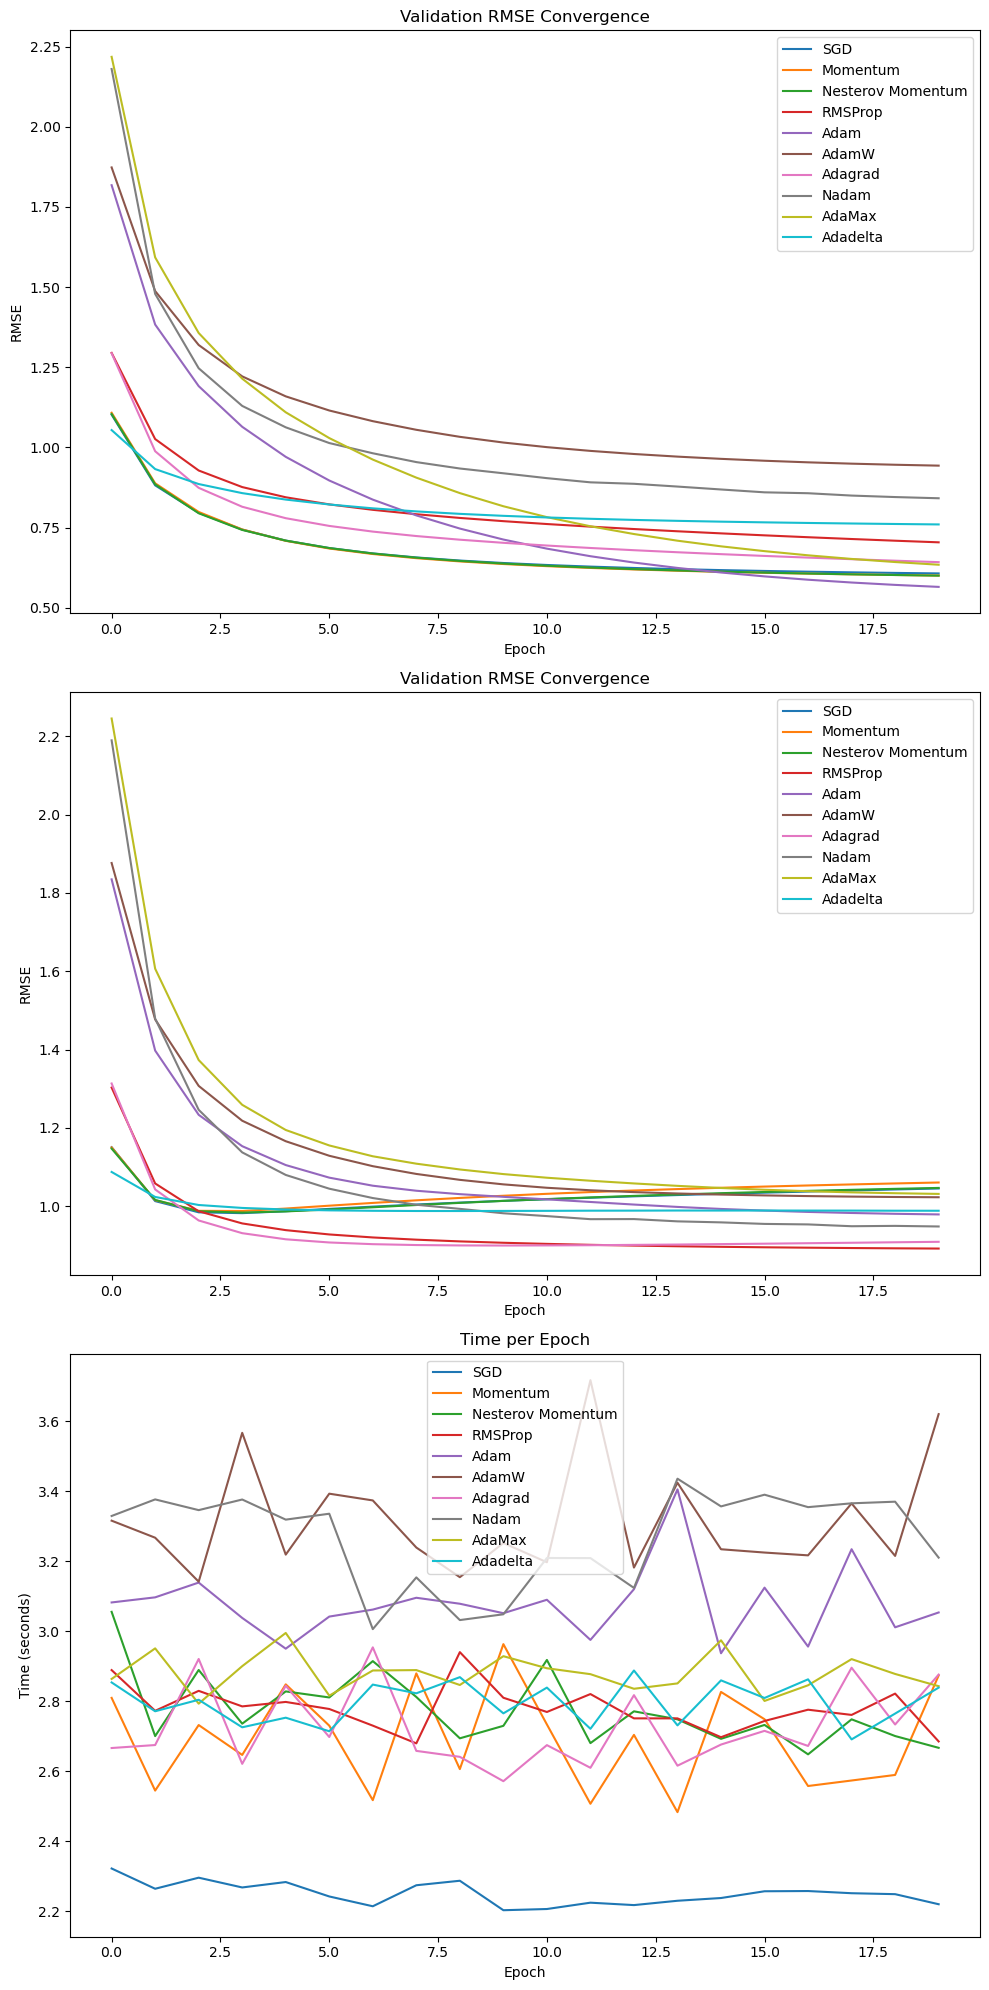

In [184]:
fig, axes = plt.subplots(3, 1, figsize=(10, 20))

for opt in optimizers:
    axes[0].plot(results[opt]['train_rmse'], label=f"{opt}")

axes[0].set_title("Validation RMSE Convergence")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("RMSE")
axes[0].legend()
#axes[0].grid(True)
#axes[0].set_yscale('log')

for opt in optimizers:
    axes[1].plot(results[opt]['val_rmse'], label=f"{opt}")

axes[1].set_title("Validation RMSE Convergence")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("RMSE")
axes[1].legend()
#axes[1].grid(True)
#axes[1].set_yscale('log')

for opt in optimizers:
    axes[2].plot(results[opt]['epoch_times'], label=f"{opt}")

axes[2].set_title("Time per Epoch")
axes[2].set_xlabel("Epoch")
axes[2].set_ylabel("Time (seconds)")
axes[2].legend()
#axes[2].grid(True)
#axes[2].set_yscale('log')

plt.tight_layout()
plt.show()

### Last.fm

   userId  artistId  weight
0  userID  artistID  weight
1       2        51   13883
2       2        52   11690
3       2        53   11351
4       2        54   10300
  artistId               name                                         url  \
0       id               name                                         url   
1        1       MALICE MIZER       http://www.last.fm/music/MALICE+MIZER   
2        2    Diary of Dreams    http://www.last.fm/music/Diary+of+Dreams   
3        3  Carpathian Forest  http://www.last.fm/music/Carpathian+Forest   
4        4       Moi dix Mois       http://www.last.fm/music/Moi+dix+Mois   

                                          pictureURL  
0                                         pictureURL  
1    http://userserve-ak.last.fm/serve/252/10808.jpg  
2  http://userserve-ak.last.fm/serve/252/3052066.jpg  
3  http://userserve-ak.last.fm/serve/252/40222717...  
4  http://userserve-ak.last.fm/serve/252/54697835...  
Number of users: 1893
Number of artists

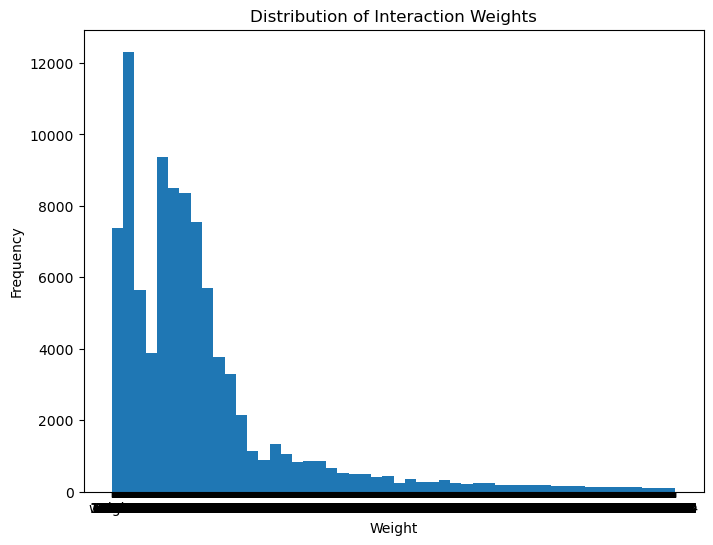

userId      0
artistId    0
weight      0
dtype: int64
artistId        0
name            0
url             0
pictureURL    444
dtype: int64


In [635]:
user_artists = pd.read_csv('lastfm/user_artists.dat', sep='\t', names=['userId', 'artistId', 'weight'])
artists = pd.read_csv('lastfm/artists.dat', sep='\t', names=['artistId', 'name', 'url', 'pictureURL'])

print(user_artists.head())
print(artists.head())

print(f"Number of users: {user_artists['userId'].nunique()}")
print(f"Number of artists: {user_artists['artistId'].nunique()}")
print(f"Number of interactions: {len(user_artists)}")

plt.figure(figsize=(8, 6))
plt.hist(user_artists['weight'], bins=50)
plt.title('Distribution of Interaction Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

print(user_artists.isnull().sum())
print(artists.isnull().sum())

In [636]:
min_interactions = 5
user_counts = user_artists['userId'].value_counts()
artist_counts = user_artists['artistId'].value_counts()

user_artists_filtered = user_artists[user_artists['userId'].isin(user_counts[user_counts >= min_interactions].index)]
user_artists_filtered = user_artists_filtered[user_artists_filtered['artistId'].\
    isin(artist_counts[artist_counts >= min_interactions].index)]

user_artists_with_names = user_artists_filtered.merge(artists[['artistId', 'name']], on='artistId')
user_artists_with_names = user_artists_with_names.rename(columns={'artistId': 'movieId', 'weight': 'rating'})

print(user_artists_with_names.head())

  userId movieId rating           name
0      2      51  13883    Duran Duran
1      2      52  11690      Morcheeba
2      2      53  11351            Air
3      2      54  10300   Hooverphonic
4      2      55   8983  Kylie Minogue


In [637]:
train_data, test_data = train_test_split(user_artists_with_names, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

print(f"Train set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")

Train set size: 57128
Validation set size: 7141
Test set size: 7142


In [491]:
user_item_matrix = train_data.pivot(index='userId', columns='movieId', values='rating')

scaler = MinMaxScaler()

pivot_table_scaled = user_item_matrix.copy()
pivot_table_scaled[:] = scaler.fit_transform(pivot_table_scaled)

print("User-Item Interaction Matrix (Sample):")
pivot_table_scaled.head()


User-Item Interaction Matrix (Sample):


movieId,10,100,1000,1001,1004,1005,1006,10069,1008,1009,...,991,992,9926,993,994,995,9955,997,998,999
userId,,,,,,,,,,,,,,,,,,,,,
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064723,NaN,NaN


In [455]:
pivot_table = user_artists_with_names.pivot_table(index='userId', columns='movieId', values='rating', aggfunc='sum')

scaler = MinMaxScaler()

pivot_table_scaled = pivot_table.copy()
pivot_table_scaled[:] = scaler.fit_transform(pivot_table_scaled)
pivot_table_scaled.fillna(0, inplace = True)

print(pivot_table_scaled.shape)
pivot_table_scaled.head()

(1874, 2828)


/var/folders/hw/63nkdpmd2m72f1vp4sfrszqw0000gn/T/ipykernel_1729/3007602141.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot_table_scaled.fillna(0, inplace = True)


movieId,10,100,1000,1001,1004,1005,1006,10069,1008,1009,...,991,992,9926,993,994,995,9955,997,998,999
userId,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
100,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1001,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1002,0.0,0.0,0.0,0.007243,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1003,0.0,0.0,0.0,0.021399,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064723,0.0,0.0


In [497]:
user_item_matrix = pivot_table_scaled.stack().reset_index(name='rating')

train_data, test_data = train_test_split(user_item_matrix, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(user_item_matrix, test_size=0.5, random_state=42)
    
print(f"Train set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")

Train set size: 45702
Validation set size: 28564
Test set size: 28564


In [501]:
# Global Mean
user_item_matrix['rating'] = pd.to_numeric(user_item_matrix['rating'], errors='coerce')
train_data['rating'] = pd.to_numeric(train_data['rating'], errors='coerce')
global_mean = user_item_matrix['rating'].mean()

# User Mean
user_means = train_data.groupby('userId')['rating'].mean()

# Item Mean
item_means = train_data.groupby('movieId')['rating'].mean()

train_data['global_mean_pred'] = global_mean
train_data['user_mean_pred'] = train_data['userId'].map(user_means)
train_data['item_mean_pred'] = train_data['movieId'].map(item_means)

def rmse(predictions, actuals):
    return np.sqrt(mean_squared_error(predictions, actuals))

# RMSE for the baseline models
print(f"Global Mean RMSE: {rmse(train_data['global_mean_pred'], train_data['rating']):.4f}")
print(f"User Mean RMSE: {rmse(train_data['user_mean_pred'], train_data['rating']):.4f}")
print(f"Item Mean RMSE: {rmse(train_data['item_mean_pred'], train_data['rating']):.4f}")

Global Mean RMSE: 0.2586
User Mean RMSE: 0.2138
Item Mean RMSE: 0.2230


In [521]:
optimizers = ["SGD", "Momentum", "Nesterov Momentum", "RMSProp", "Adam", "AdamW", "Adagrad", "Nadam", "AdaMax", "Adadelta"]

best_params_for_opt = {}

num_epochs = 2

grid_search_optimizer(train_data, val_data, test_data)

print("Best parameters for each optimizer:")
for optimizer, best_params in best_params_for_opt.items():
    print(f"{optimizer}: {best_params}")


Running grid search for SGD optimizer...
Epoch 1/2, Training RMSE: 0.2614, Validation RMSE: 0.2580
Epoch 2/2, Training RMSE: 0.2608, Validation RMSE: 0.2574
Epoch 1/2, Training RMSE: 0.2619, Validation RMSE: 0.2586
Epoch 2/2, Training RMSE: 0.2613, Validation RMSE: 0.2580
Epoch 1/2, Training RMSE: 0.2618, Validation RMSE: 0.2584
Epoch 2/2, Training RMSE: 0.2612, Validation RMSE: 0.2578
Epoch 1/2, Training RMSE: 0.2614, Validation RMSE: 0.2582
Epoch 2/2, Training RMSE: 0.2607, Validation RMSE: 0.2575
Epoch 1/2, Training RMSE: 0.2615, Validation RMSE: 0.2584
Epoch 2/2, Training RMSE: 0.2608, Validation RMSE: 0.2576
Epoch 1/2, Training RMSE: 0.2613, Validation RMSE: 0.2578
Epoch 2/2, Training RMSE: 0.2606, Validation RMSE: 0.2571
Epoch 1/2, Training RMSE: 0.2608, Validation RMSE: 0.2575
Epoch 2/2, Training RMSE: 0.2602, Validation RMSE: 0.2568
Epoch 1/2, Training RMSE: 0.2606, Validation RMSE: 0.2571
Epoch 2/2, Training RMSE: 0.2600, Validation RMSE: 0.2566
Epoch 1/2, Training RMSE: 0.26

In [110]:
results = {}
models = {}

optimizers = ["SGD", "RMSProp", "Adam"]


for opt in optimizers:
    start_time = time.time()
    print(f"\nTraining with {opt} optimizer...")

    opt_params = best_params_for_opt.get(opt, {})

    learning_rate = opt_params.get("learning_rate", 0.01)  # Use default if not provided
    reg_param = opt_params.get("reg_param", 0.1)
    num_epochs = opt_params.get("num_epochs", 20)
    batch_size = opt_params.get("batch_size", 1000)
    beta1 = opt_params.get("beta1", 0.9)
    beta2 = opt_params.get("beta2", 0.999)
    epsilon = opt_params.get("epsilon", 1e-8)
    rho = opt_params.get("rho", 0.95)
    epsilon_adamax = opt_params.get("epsilon_adamax", 1e-8)

    mf_model = MatrixFactorizationWithOptimizers(
        num_users=num_users,
        num_items=num_items,
        num_factors=10,
        learning_rate=learning_rate,
        reg_param=reg_param,
        num_epochs=10,
        optimizer=opt,
        batch_size=batch_size,
        beta1=beta1,
        beta2=beta2,
        epsilon=epsilon,
        rho=rho,
        epsilon_adamax=epsilon_adamax
    )
    models[opt] = mf_model

    train_rmse, val_rmse, epoch_times = mf_model.train(train_data, val_data)
    test_rmse = mf_model.evaluate(test_data)
    total_time = time.time() - start_time
    
    results[opt] = {'test_rmse': test_rmse, 'train_rmse': train_rmse, 'val_rmse': val_rmse, 'epoch_times': epoch_times}
    
    print(f"{opt} Test RMSE: {test_rmse:.4f}, time is {total_time:.4f} sec")


Training with SGD optimizer...
Epoch 1/50, Training RMSE: 1.0981, Validation RMSE: 1.1460
Epoch 2/50, Training RMSE: 0.8797, Validation RMSE: 1.0122
Epoch 3/50, Training RMSE: 0.7951, Validation RMSE: 0.9846
Epoch 4/50, Training RMSE: 0.7432, Validation RMSE: 0.9815
Epoch 5/50, Training RMSE: 0.7093, Validation RMSE: 0.9850
Epoch 6/50, Training RMSE: 0.6862, Validation RMSE: 0.9899
Epoch 7/50, Training RMSE: 0.6695, Validation RMSE: 0.9952
Epoch 8/50, Training RMSE: 0.6569, Validation RMSE: 1.0005
Epoch 9/50, Training RMSE: 0.6469, Validation RMSE: 1.0058
Epoch 10/50, Training RMSE: 0.6390, Validation RMSE: 1.0107
Epoch 11/50, Training RMSE: 0.6325, Validation RMSE: 1.0153
Epoch 12/50, Training RMSE: 0.6272, Validation RMSE: 1.0195
Epoch 13/50, Training RMSE: 0.6227, Validation RMSE: 1.0234
Epoch 14/50, Training RMSE: 0.6188, Validation RMSE: 1.0270
Epoch 15/50, Training RMSE: 0.6156, Validation RMSE: 1.0304
Epoch 16/50, Training RMSE: 0.6127, Validation RMSE: 1.0336
Epoch 17/50, Trai

KeyboardInterrupt: 

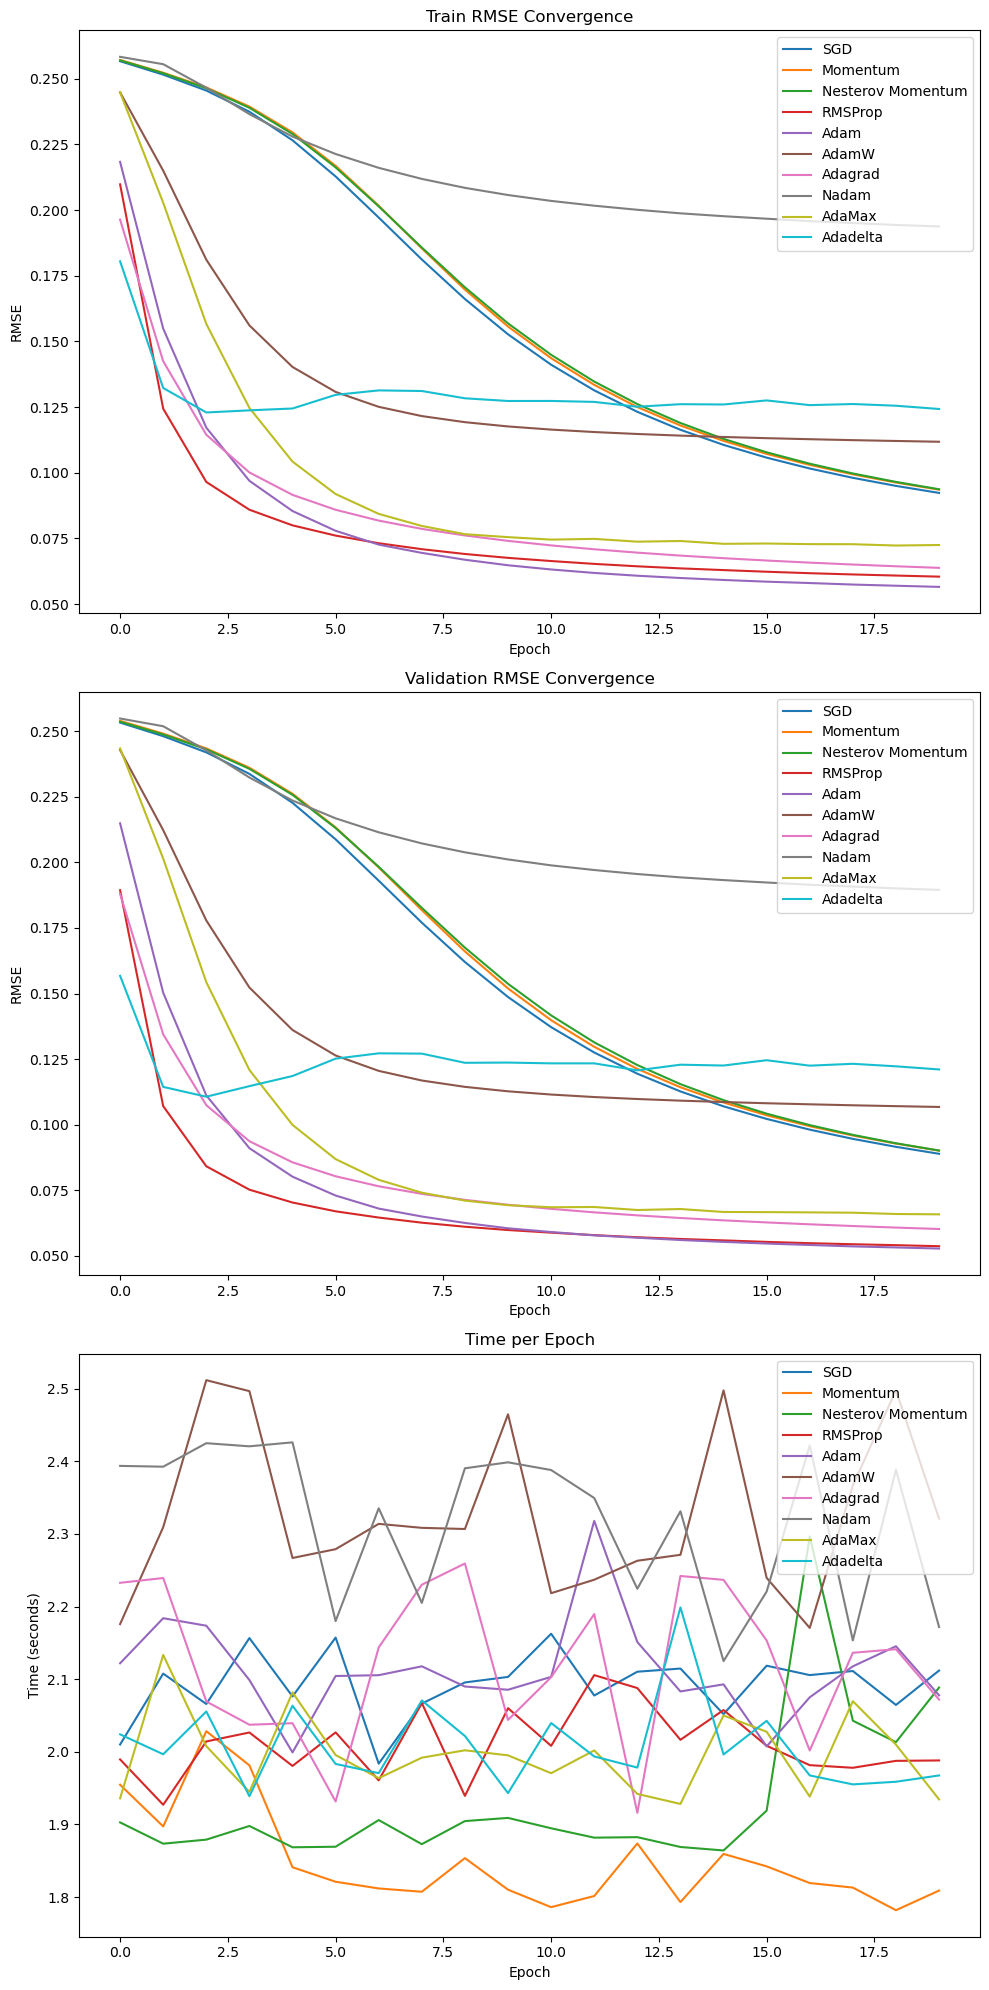

In [526]:
fig, axes = plt.subplots(3, 1, figsize=(10, 20))

# RMSE Convergence
for opt in optimizers:
    axes[0].plot(results[opt]['train_rmse'], label=f"{opt}")

axes[0].set_title("Train RMSE Convergence")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("RMSE")
axes[0].legend()
#axes[0].grid(True)
#axes[0].set_yscale('log')

for opt in optimizers:
    axes[1].plot(results[opt]['val_rmse'], label=f"{opt}")

axes[1].set_title("Validation RMSE Convergence")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("RMSE")
axes[1].legend()
#axes[1].grid(True)
#axes[1].set_yscale('log')

# Time per Epoch
for opt in optimizers:
    axes[2].plot(results[opt]['epoch_times'], label=f"{opt}")

axes[2].set_title("Time per Epoch")
axes[2].set_xlabel("Epoch")
axes[2].set_ylabel("Time (seconds)")
axes[2].legend()
#axes[2].grid(True)
#axes[2].set_yscale('log')

plt.tight_layout()
plt.show()

#### RecSys metrics

In [46]:
def precision_at_k(y_true, y_pred, k=10):
    top_k_preds = np.argsort(y_pred)[::-1][:k]
    relevant_items = set(y_true) 
    return len(relevant_items.intersection(top_k_preds)) / k

def recall_at_k(y_true, y_pred, k=10):
    top_k_preds = np.argsort(y_pred)[::-1][:k]
    relevant_items = set(y_true)
    return len(relevant_items.intersection(top_k_preds)) / len(relevant_items)

def ndcg_at_k(y_true, y_pred, k=10):
    top_k_preds = np.argsort(y_pred)[::-1][:k]
    relevance = [1 if item in y_true else 0 for item in top_k_preds]
    dcg = np.sum([rel / np.log2(idx + 2) for idx, rel in enumerate(relevance)]) 
    idcg = np.sum([1 / np.log2(idx + 2) for idx in range(len(y_true))]) 
    return dcg / idcg if idcg != 0 else 0

In [47]:
global_mean_preds = np.full(len(test_data), global_mean)  # Global mean prediction for all test data

test_data['user_mean_pred'] = test_data['userId'].map(user_means).fillna(global_mean)
test_data['item_mean_pred'] = test_data['movieId'].map(item_means).fillna(global_mean)

y_true = test_data.groupby('userId')['rating'].apply(list).to_dict()

global_precision_at_k = []
global_recall_at_k = []
global_ndcg_at_k = []

user_precision_at_k = []
user_recall_at_k = []
user_ndcg_at_k = []

item_precision_at_k = []
item_recall_at_k = []
item_ndcg_at_k = []

for user, actual_items in y_true.items():

    user_data = test_data[test_data['userId'] == user]
    
    pred_global = np.full(len(user_data), global_mean) 
    
    pred_user = user_data['user_mean_pred'].values
    
    pred_item = user_data['item_mean_pred'].values
    
    # Global Mean
    global_precision_at_k.append(precision_at_k(actual_items, pred_global))
    global_recall_at_k.append(recall_at_k(actual_items, pred_global))
    global_ndcg_at_k.append(ndcg_at_k(actual_items, pred_global))
    
    # User Mean
    user_precision_at_k.append(precision_at_k(actual_items, pred_user))
    user_recall_at_k.append(recall_at_k(actual_items, pred_user))
    user_ndcg_at_k.append(ndcg_at_k(actual_items, pred_user))
    
    # Item Mean
    item_precision_at_k.append(precision_at_k(actual_items, pred_item))
    item_recall_at_k.append(recall_at_k(actual_items, pred_item))
    item_ndcg_at_k.append(ndcg_at_k(actual_items, pred_item))

print(f"Global Mean - Precision@10: {np.mean(global_precision_at_k):.4f}")
print(f"Global Mean - Recall@10: {np.mean(global_recall_at_k):.4f}")
print(f"Global Mean - NDCG@10: {np.mean(global_ndcg_at_k):.4f}")

print(f"\nUser Mean - Precision@10: {np.mean(user_precision_at_k):.4f}")
print(f"User Mean - Recall@10: {np.mean(user_recall_at_k):.4f}")
print(f"User Mean - NDCG@10: {np.mean(user_ndcg_at_k):.4f}")

print(f"\nItem Mean - Precision@10: {np.mean(item_precision_at_k):.4f}")
print(f"Item Mean - Recall@10: {np.mean(item_recall_at_k):.4f}")
print(f"Item Mean - NDCG@10: {np.mean(item_ndcg_at_k):.4f}")


Global Mean - Precision@10: 0.1583
Global Mean - Recall@10: 0.4094
Global Mean - NDCG@10: 0.1887

User Mean - Precision@10: 0.1583
User Mean - Recall@10: 0.4094
User Mean - NDCG@10: 0.1887

Item Mean - Precision@10: 0.1449
Item Mean - Recall@10: 0.3807
Item Mean - NDCG@10: 0.1802


In [129]:
models

{'SGD': <__main__.MatrixFactorizationWithOptimizers at 0x1753acd40>}

In [131]:
model_sgd = models['SGD']
model_adam = models['Adam'] 
model_rmsprop = models['RMSProp'] 

user_id_map = {user_id: idx for idx, user_id in enumerate(train_data['userId'].unique())}
item_id_map = {item_id: idx for idx, item_id in enumerate(train_data['movieId'].unique())}

user_index_map = {idx: user_id for user_id, idx in user_id_map.items()}
item_index_map = {idx: item_id for item_id, idx in item_id_map.items()}

def get_model_predictions(model, test_data):
    predictions = []
    for user, item in zip(test_data['userId'], test_data['movieId']):
        user_idx = user_id_map.get(user) 
        item_idx = item_id_map.get(item)  
        
        if user_idx is not None and item_idx is not None:
            prediction = model.predict(user_idx, item_idx) 
        else:
            prediction = 0 
        predictions.append(prediction)
    
    return np.array(predictions)

sgd_preds = get_model_predictions(model_sgd, test_data)
adam_preds = get_model_predictions(model_adam, test_data)
rmsprop_preds = get_model_predictions(model_rmsprop, test_data)

def evaluate_model(predictions, test_data, k=10):
    y_true = test_data.groupby('userId')['rating'].apply(list).to_dict()
    
    precision_at_k_scores = []
    recall_at_k_scores = []
    ndcg_at_k_scores = []
    
    for user, actual_items in y_true.items():
        user_data = test_data[test_data['userId'] == user]

        user_preds = predictions[user_data.index]

        precision_at_k_scores.append(precision_at_k(actual_items, user_preds, k))
        recall_at_k_scores.append(recall_at_k(actual_items, user_preds, k))
        ndcg_at_k_scores.append(ndcg_at_k(actual_items, user_preds, k))
    
    # Return the average scores
    return {
        'precision_at_k': np.mean(precision_at_k_scores),
        'recall_at_k': np.mean(recall_at_k_scores),
        'ndcg_at_k': np.mean(ndcg_at_k_scores)
    }

# Evaluate each model
sgd_metrics = evaluate_model(sgd_preds, test_data, k=10)
adam_metrics = evaluate_model(adam_preds, test_data, k=10)
rmsprop_metrics = evaluate_model(rmsprop_preds, test_data, k=10)

print(f"SGD Model - Precision@10: {sgd_metrics['precision_at_k']:.4f}") 
print(f"SGD Model - Recall@10: {sgd_metrics['recall_at_k']:.4f}")
print(f"SGD Model, NDCG@10: {sgd_metrics['ndcg_at_k']:.4f}")
print(f"\nAdam Model - Precision@10: {adam_metrics['precision_at_k']:.4f}")
print(f"Adam ModelRecall@10: {adam_metrics['recall_at_k']:.4f}")
print(f"Adam ModelNDCG@10: {adam_metrics['ndcg_at_k']:.4f}")
print(f"\nRMSProp Model - Precision@10: {rmsprop_metrics['precision_at_k']:.4f}")
print(f"RMSProp Model - Recall@10: {rmsprop_metrics['recall_at_k']:.4f}")
print(f"RMSProp Model - NDCG@10: {rmsprop_metrics['ndcg_at_k']:.4f}")

SGD Model - Precision@10: 0.1414
SGD Model - Recall@10: 0.3730
SGD Model, NDCG@10: 0.1774

Adam Model - Precision@10: 0.1415
Adam ModelRecall@10: 0.3745
Adam ModelNDCG@10: 0.1764

RMSProp Model - Precision@10: 0.1412
RMSProp Model - Recall@10: 0.3737
RMSProp Model - NDCG@10: 0.1780
